# Laboratorio de métodos aplicados: Tarea 1
**Estudiante: Nicolás Netz**

**N°Mat: 2018458791**

**Correo: nnetz2018@udec.cl**

**Prof. Juan Carlos Caro**



# Importar los módulos necesarios y la data
En el presente notebook se utilizan distintas librerías para apoyar los cálculos y las visualizaciones. Además, se incluye una serie de funciones extra, para reutilizar código en distintas celdas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
# from utilities import plot_top_quantile, plot_tail, get_msno_plot, corr_plot, bi_scatter_by, read_and_clean

def plot_top_quantile(df,axes ,col='age', plot_all=False, sort_x_axis=False):
    if not sort_x_axis:
        if not plot_all:
            df_grouped = df.groupby([col]).size().reset_index(name='num')
            quantile = 1 - 20/len(df_grouped.num)
            df_top = df_grouped[df_grouped['num']>= df_grouped['num'].quantile(quantile)].sort_values(by='num', ascending=False).reset_index(drop=True, ax=axes[0])
            plot = df_top.plot.bar(x = col, y = 'num', rot = 1, title=col)
        else:
            df_grouped = df.groupby([col]).size().reset_index(name='num')
            df_top = df_grouped.sort_values(by='num', ascending=False).reset_index(drop=True)
            plot = df_top.plot.bar(x = col, y = 'num', rot = 1, title=col, ax=axes[0])
    else:
        if not plot_all:
            df_grouped = df.groupby([col]).size().reset_index(name='num')
            quantile = 1 - 20/len(df_grouped.num)
            df_top = df_grouped[df_grouped['num']>= df_grouped['num'].quantile(quantile)].sort_values(by=col, ascending=True).reset_index(drop=True)
            plot = df_top.plot.bar(x = col, y = 'num', rot = 1, title="""Column: {} of type {} has {:0.2f}% of NA values.""".format(col, df[col].dtype,(df[col].isna().sum()/df[col].count())*100), ax=axes[0])
        else:
            df_grouped = df.groupby([col]).size().reset_index(name='num')
            df_top = df_grouped.sort_values(by=col, ascending=True).reset_index(drop=True)
            plot = df_top.plot.bar(x = col, y = 'num', rot = 1, title="""Column: {} of type {} has {:0.2f}% of NA values.""".format(col, df[col].dtype,(df[col].isna().sum()/df[col].count())*100), ax=axes[0])
    return 

def plot_tail(df, col, axes):
    df_grouped = df.groupby([col]).size().reset_index(name='num').sort_values(by='num', ascending=False)
    df_tail = df_grouped.tail(10).sort_values(by='num', ascending=False).reset_index(drop=True)
    df_tail.plot.bar(x = col, y = 'num', rot = 1, title='Distribution tail', ax=axes[1])

def get_msno_plot(df):
    fig, ax = plt.subplots(3,1,figsize=(7,12))
    plt.subplots_adjust(hspace=1.5)
    msno.bar(df,ax=ax[0])
    msno.matrix(df,ax=ax[1])
    msno.heatmap(df,ax=ax[2])
    return

def bi_scatter_by(df, by = 'retin',x_var = 'wealth',y_var = 'age'):
    ax1 = df[df[by] == 0].plot(kind='scatter', x=x_var, y=y_var, color='blue', alpha=0.5, figsize=(6, 6))
    df[df[by] == 1].plot(kind='scatter', x=x_var, y=y_var, color='magenta', alpha=0.5, figsize=(6 ,6), ax=ax1)
    plt.legend(labels=['{} == 0'.format(by), '{} == 1'.format(by)])
    plt.title('Relationship between {} and {}, by {}'.format(x_var, y_var, by), size=10)
    plt.xlabel(x_var, size=10)
    plt.ylabel(y_var, size=10)
    plt.show()

def corr_plot(df):
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(9, 9))
    ax.set_title('Correlation')
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

def read_and_clean(data_path):
    df = pd.read_csv(data_path, na_values=[])
    # Reemplazar
    df = df.replace({'.r': np.nan, '.m': np.nan, '.d': np.nan})
    # botar n/a
    df = df.dropna().reset_index(drop=True)
    # Cambiar el tipo de objeto
    df['drinkly'] = df['drinkly'].astype(float)
    # Filtrar a la gente que está retirada
    df = df[df['retired'] == 0].reset_index(drop=True)
    # Agregar epsilon a wealth y aplicar logaritmo
    df.loc[df['wealth'] >= 0, 'logwealth'] = df.loc[df['wealth'] >= 0, 'wealth']- df['wealth'].min()
    df.loc[df['wealth'] < 0, 'logwealth'] = df.loc[df['wealth'] < 0, 'wealth'] - df['wealth'].min()
    df['logwealth'] = np.log10(df['logwealth'] + 0.1)
    # Create variable hasdebt
    df['hasdebt'] = (df['wealth'] < 0).astype(int)
    return df

In [2]:
# Se lee la data
data_path = 'LAB-MAA/data/charls2.csv'
df = pd.read_csv(data_path, na_values=[])
# Reemplazar n/a values
df = df.replace({'.r': np.nan, '.m': np.nan, '.d': np.nan})
# Se cambia el tipo de la variable que traía los string a float.
df.drinkly = df.drinkly.astype(float)

In [3]:
# Visualizar la data
df.head()

,age,cesd,child,drinkly,female,hrsusu,hsize,intmonth,married,retage,retin,retired,schadj,urban,wealth
0,46,6.0,2,0.0,1,0.000000,4,7,1,24,1,0,0,0,-5800.0
1,48,0.0,2,1.0,0,4.143135,4,7,1,22,1,0,4,0,-5800.0
2,56,6.0,1,0.0,1,0.000000,6,8,1,0,0,0,0,0,350.0
3,59,6.0,1,1.0,0,0.000000,6,8,1,0,0,0,0,0,350.0
4,47,4.0,1,1.0,0,3.806663,3,8,1,11,1,0,4,0,-8100.0


In [4]:
# Ver las columnas
df.columns

Index(['age', 'cesd', 'child', 'drinkly', 'female', 'hrsusu', 'hsize',
       'intmonth', 'married', 'retage', 'retin', 'retired', 'schadj', 'urban',
       'wealth'],
      dtype='object')

In [5]:
# Información sobre el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9456 entries, 0 to 9455
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9456 non-null   int64  
 1   cesd      8802 non-null   float64
 2   child     9456 non-null   int64  
 3   drinkly   9418 non-null   float64
 4   female    9456 non-null   int64  
 5   hrsusu    9456 non-null   float64
 6   hsize     9456 non-null   int64  
 7   intmonth  9456 non-null   int64  
 8   married   9456 non-null   int64  
 9   retage    9456 non-null   int64  
 10  retin     9456 non-null   int64  
 11  retired   9456 non-null   int64  
 12  schadj    9456 non-null   int64  
 13  urban     9456 non-null   int64  
 14  wealth    8590 non-null   float64
dtypes: float64(4), int64(11)
memory usage: 1.1 MB


In [6]:
# Estadísticos descriptivos de las variables.
df.describe()
# Here, the mean is compared with the maximum value and the minimum, to see if something is out of range.
# Note that there's wealth =-1000000.000000. This  is because wealth is calculated as the difference between assets and liabilities.

,age,cesd,child,drinkly,female,hrsusu,hsize,intmonth,married,retage,retin,retired,schadj,urban,wealth
count,9456.000000,8802.000000,9456.000000,9418.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,8590.000000
mean,58.087035,9.034992,2.751586,0.334678,0.525275,2.552777,3.758249,7.495347,0.885364,1.390969,0.152602,0.183376,4.100888,0.213832,1367.140978
std,9.462629,6.462808,1.400139,0.471903,0.499387,1.802885,1.823791,1.009306,0.318599,4.102102,0.359622,0.386995,3.574570,0.410032,43102.281560
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1000000.000000
25%,50.000000,4.000000,2.000000,0.000000,0.000000,0.000000,2.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,57.000000,8.000000,2.000000,0.000000,1.000000,3.555348,3.000000,7.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,400.000000
75%,64.000000,13.000000,3.000000,1.000000,1.000000,4.025352,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,2187.500000
max,100.000000,30.000000,10.000000,1.000000,1.000000,5.123964,16.000000,12.000000,1.000000,37.000000,1.000000,1.000000,16.000000,1.000000,900100.000000


# Data description
Se incluye la siguiente tabla resumen sobre cada columna.

|column|dtype|type|description|
|------|-----|----|-----------|
|age|int|cuantitative discrete|edad al entrar a la encuesta|
cesd|float|cuantitative continuous|puntaje en la escala de salud mental (0-30)|
child|int|cuantitative discrete|numero de hijos|
drinkly|object|binary|bebio alcohol en el ultimo mes (binario)|
female|int|binary|1 si es mujer, 0 si es hombre|
hrsusu|float|cuantitative continuous|horas promedio trabajo diario|
hsize|int|cuantitative discrete|tamano del hogar|
intmonth|int|cuantitative discrete|mes en que fue encuestado/a (1-12)|
married|int|binary|si esta casado/a (binario)|
retage|int|cuantitative discrete|cuando planea retirarse, medido en años desde la fecha de encuesta (0 implica retirado/a o no planea retirarse)|
retin|int|binary|1 si planea planea retirarse|
retired|int|binary|1 si esta retirado/a (binario)|
schadj|int|cuantitative discrete|años de escolaridad|
urban|int|binary|zona urbana (binario)|
wealth|float|cuantitative continuous|riqueza neta (miles RMB)|

# Visualizaciónes de distribuciones
Se generan histogramas de la data de distintas columnas para ver la distribución de ellas. 
Notar que:

* El gráfico de la izquierda indica los primeros valores de la distribución, mientras que los de la derecha indican la cola de la distribución solamente. De esta manera, se evita que los gráficos estén muy densos y no se puedan interpretar claramente.
* En el título de cada distribución se indica la cantidad de valores N/A que se presentan en la columna, pues estos no son graficados. Ej. cesd tiene 7.43% de N/A values.


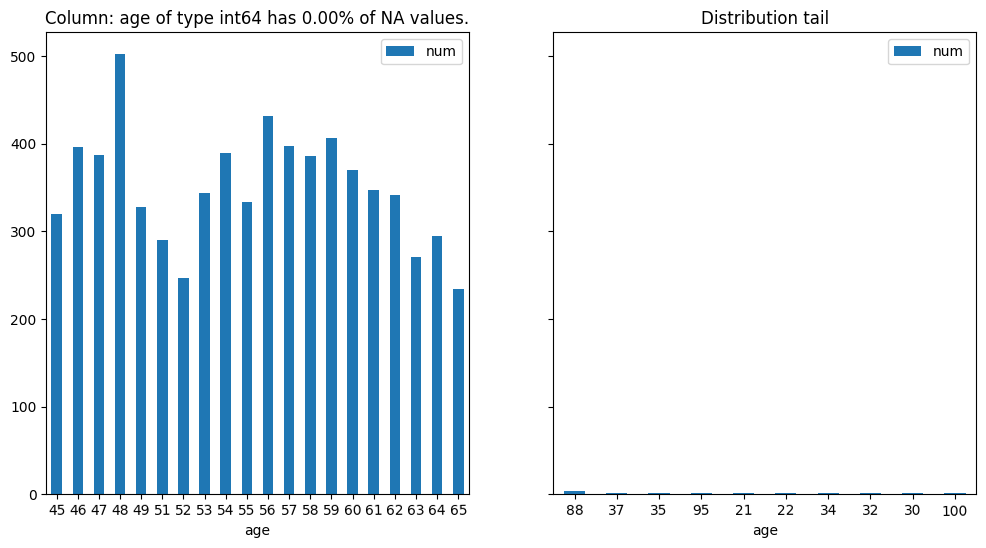

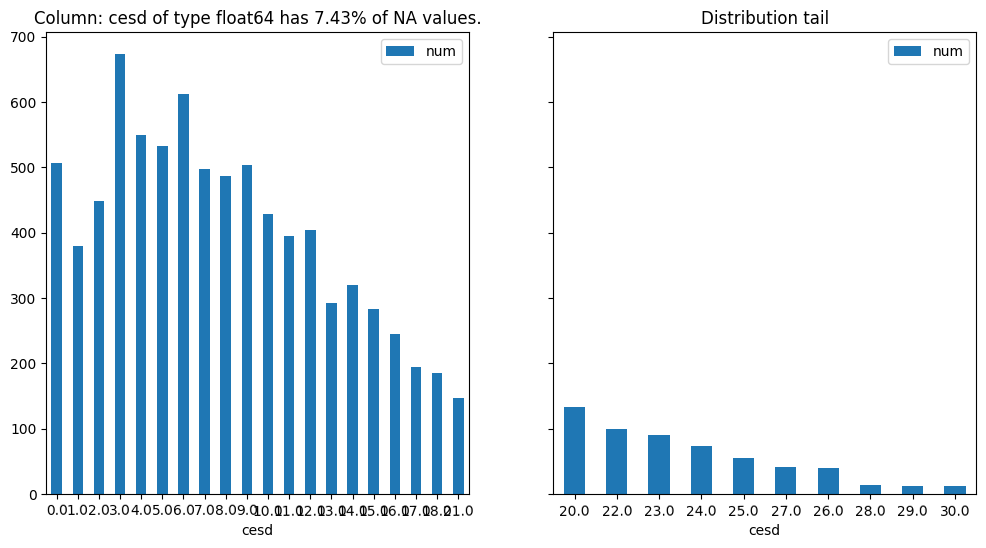

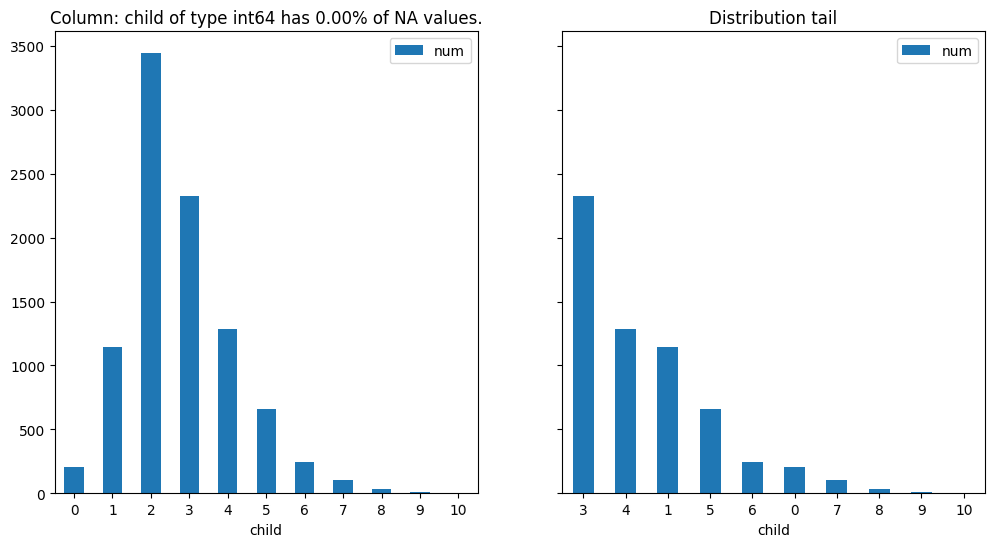

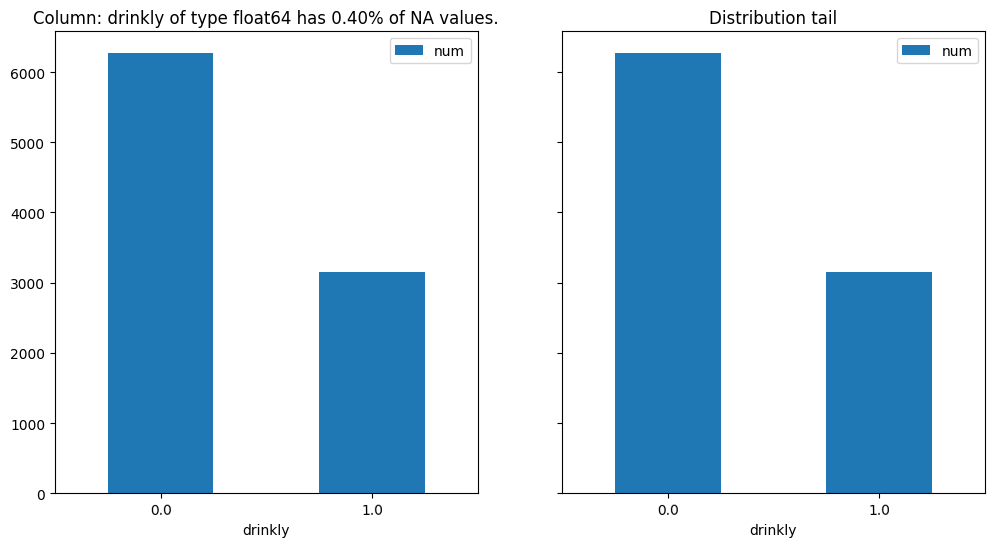

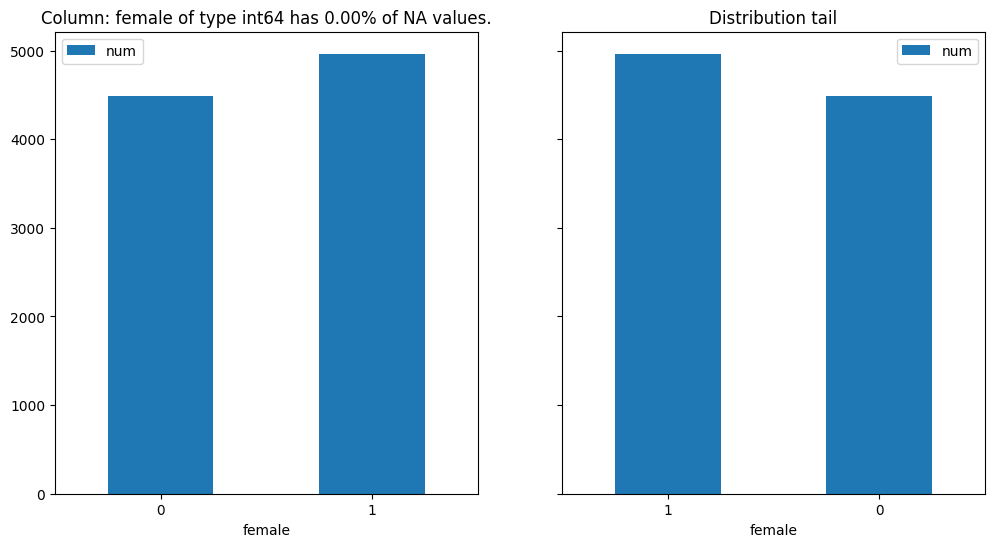

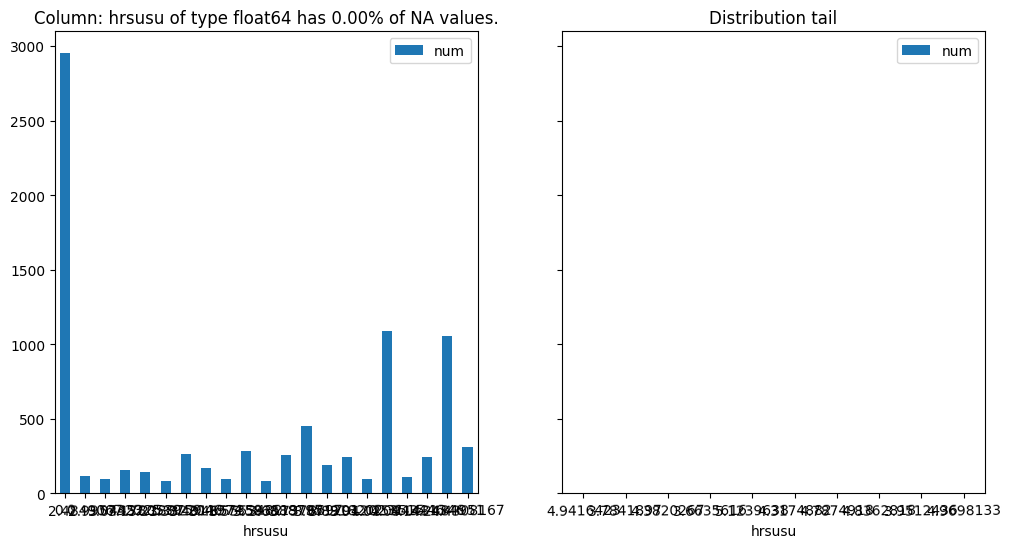

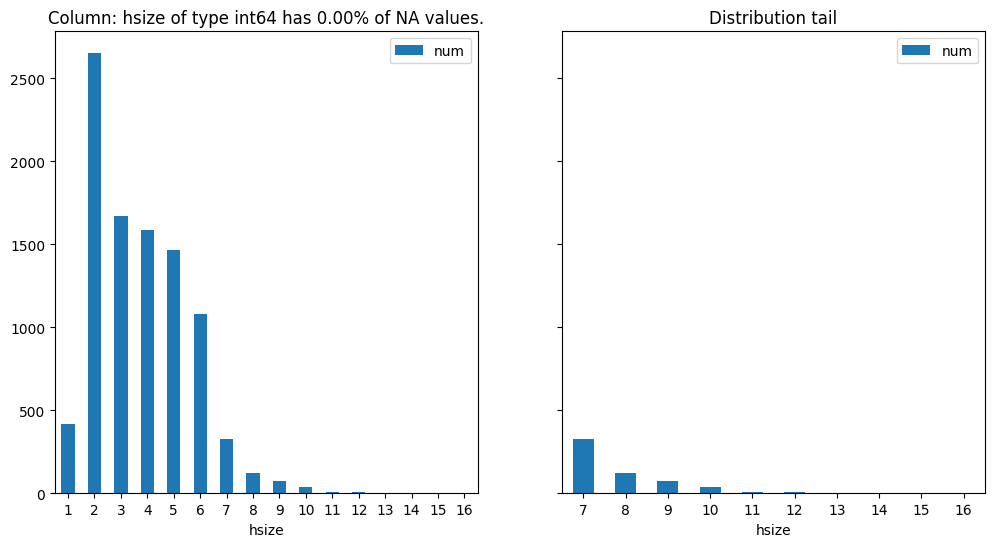

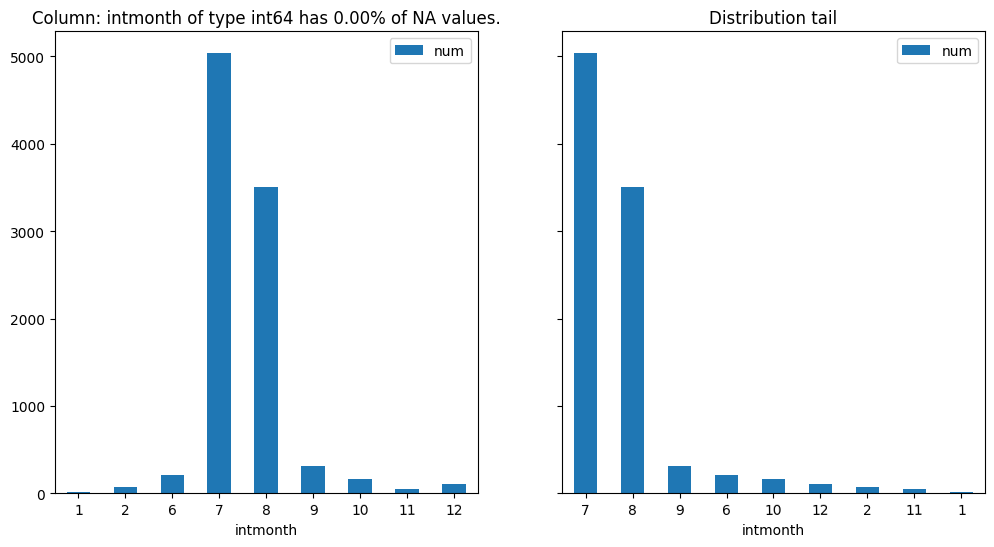

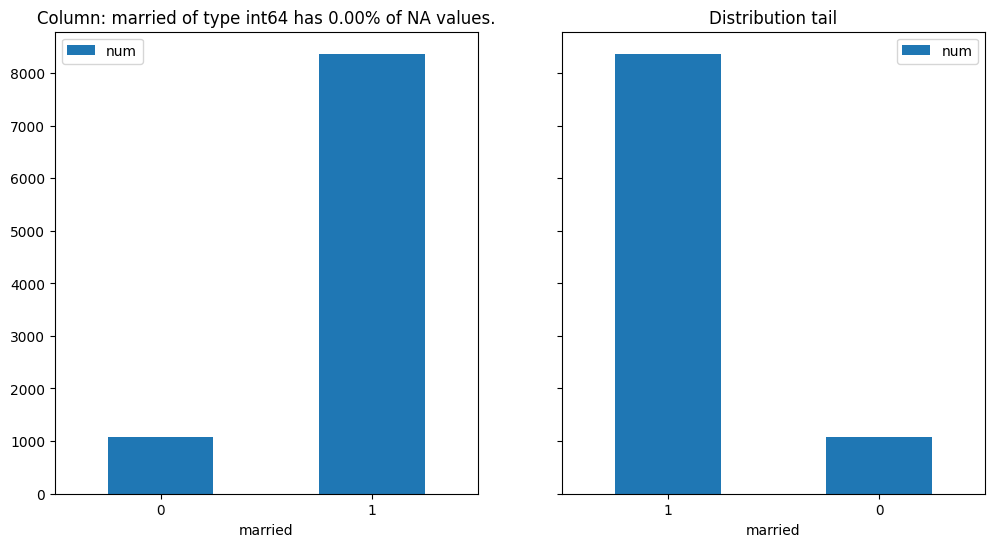

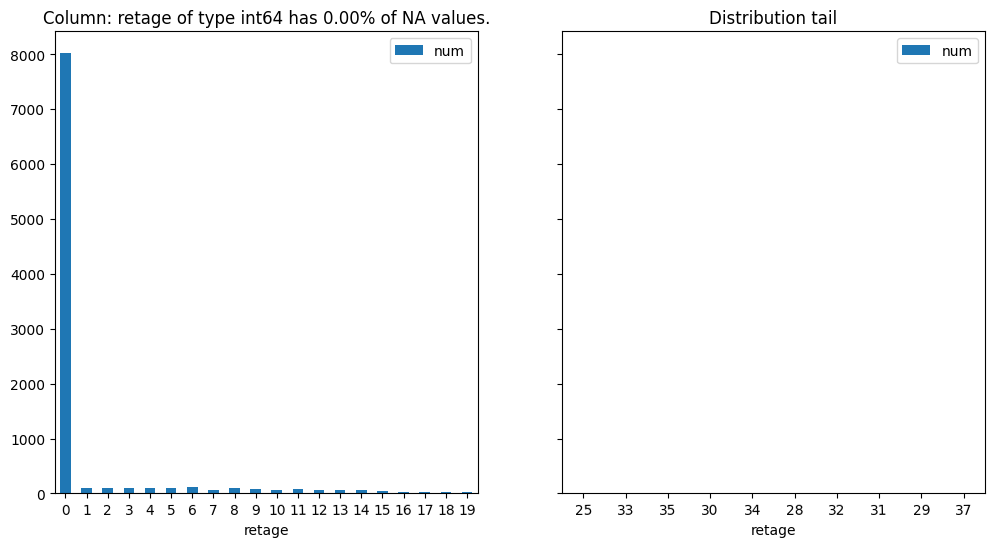

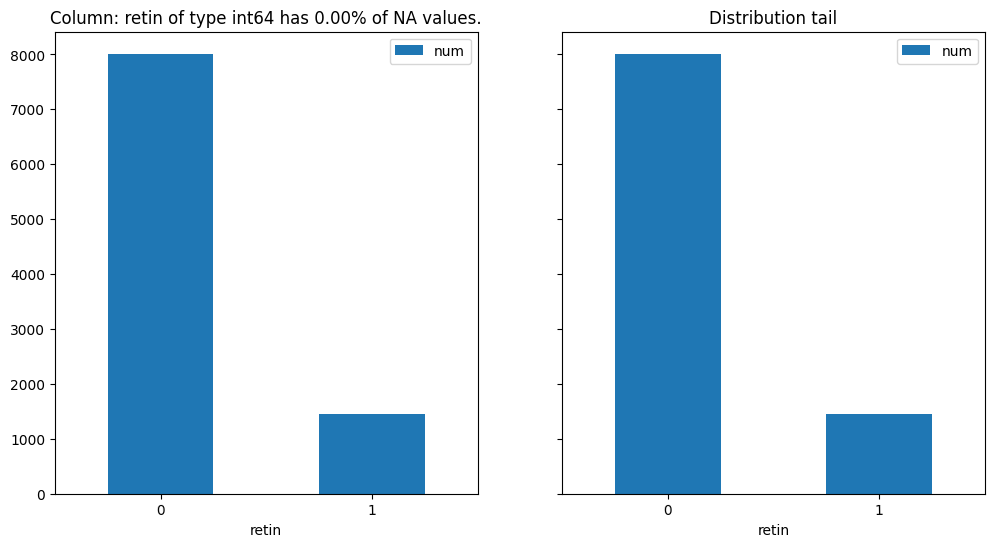

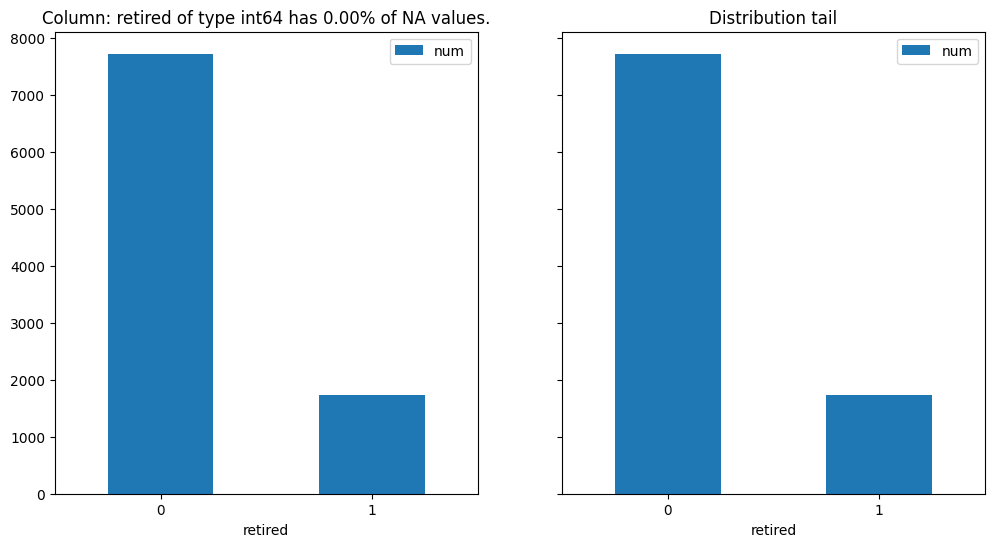

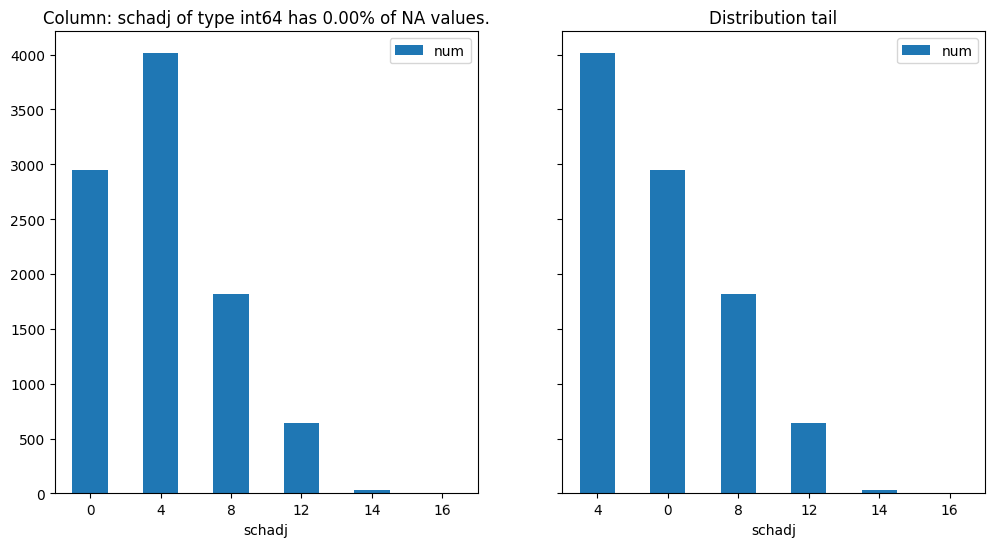

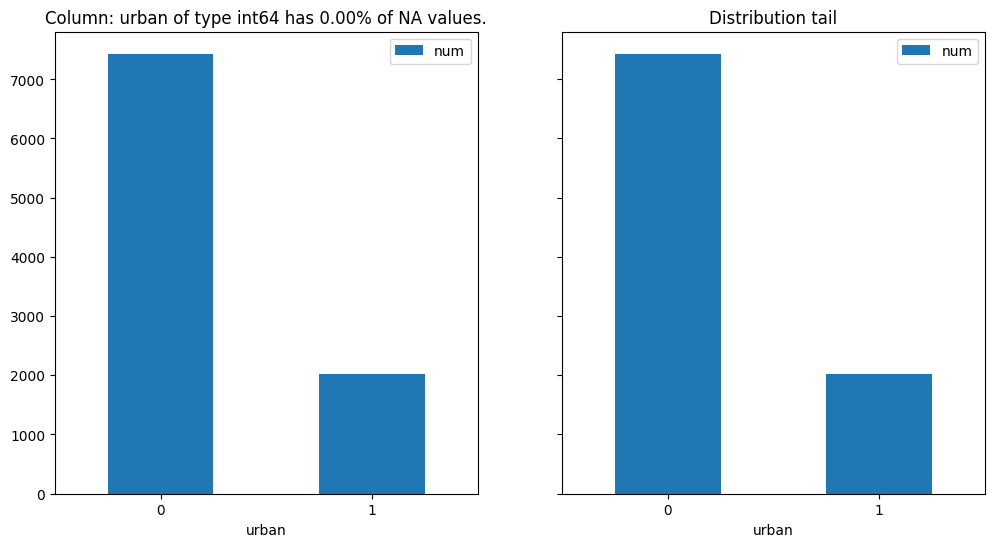

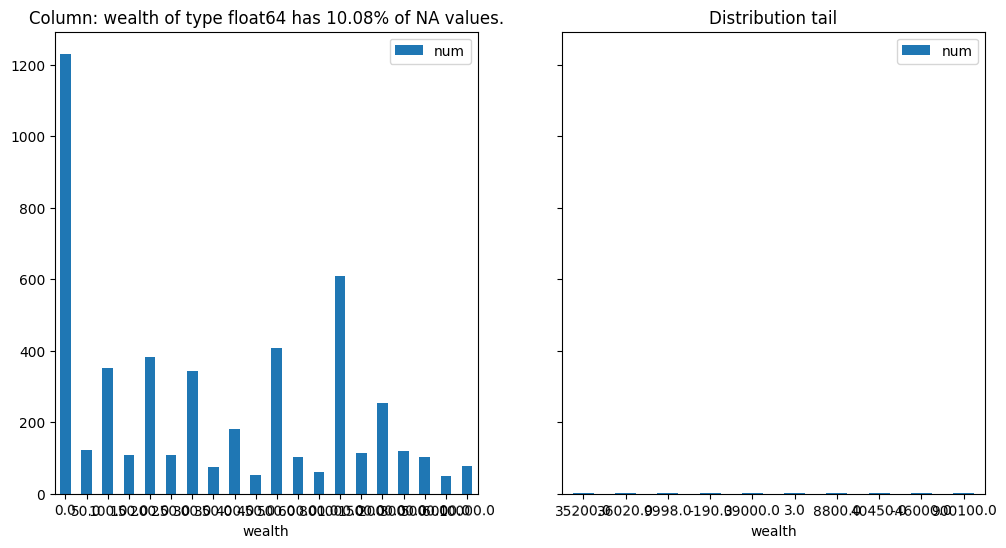

In [7]:
for col in df.columns:
    fig, axes = plt.subplots(1,2,figsize=(12, 6),sharey=True)
    try:
        plot_top_quantile(df, axes,col, sort_x_axis=True)
        plot_tail(df,col,axes)
    except Exception as e:
        plot_top_quantile(df, axes,col,plot_all=True, sort_x_axis=True)
        plot_tail(df,col,axes)

# Visualización de datos faltantes
Con apoyo de la librería missingno, se genera la función get_msno_plot, que permite imprimir la imagen a continuación.
La figura incluye tres gráficos:
1. Se genera un gráfico de barras con la cantidad de datos presentes para cada columna del dataframe, lo que permite visualizar en qué columnas hay más datos faltantes. En la parte superior de cada barra se indica la cantidad de datos no faltantes. Ej. en age, se tienen 9456 valores no nulos, mientras que en cesd (donde un 7.43% de los datos es faltante, según lo visto en la sección anterior), se tiene 8802 valores no nulos.
2. Se genera una visualización del patrón de perdida de datos, donde se puede ver la relación de perdida de datos a lo largo del dataframe. No se logra apreciar un patrón que indique algo consistente, si no que pareciese ser aleatorio.
3. Se genera un gráfico de la matriz de correlación entre variables con pérdida de datos. En esta figura se puede ver que las tres variables con perdida de datos son cesd, drinkly y wealth. Dado que la correlacion entre ellas es baja, no se logra apreciar que haya una pérdida sistemática de datos entre las variables. Ej. una alta correlación en esa matriz indicaría que la perdida de datos de una columna implica una pérdida de datos en otra columna.

/Users/nicolas/.virtualenvs/lab-maa/lib/python3.8/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


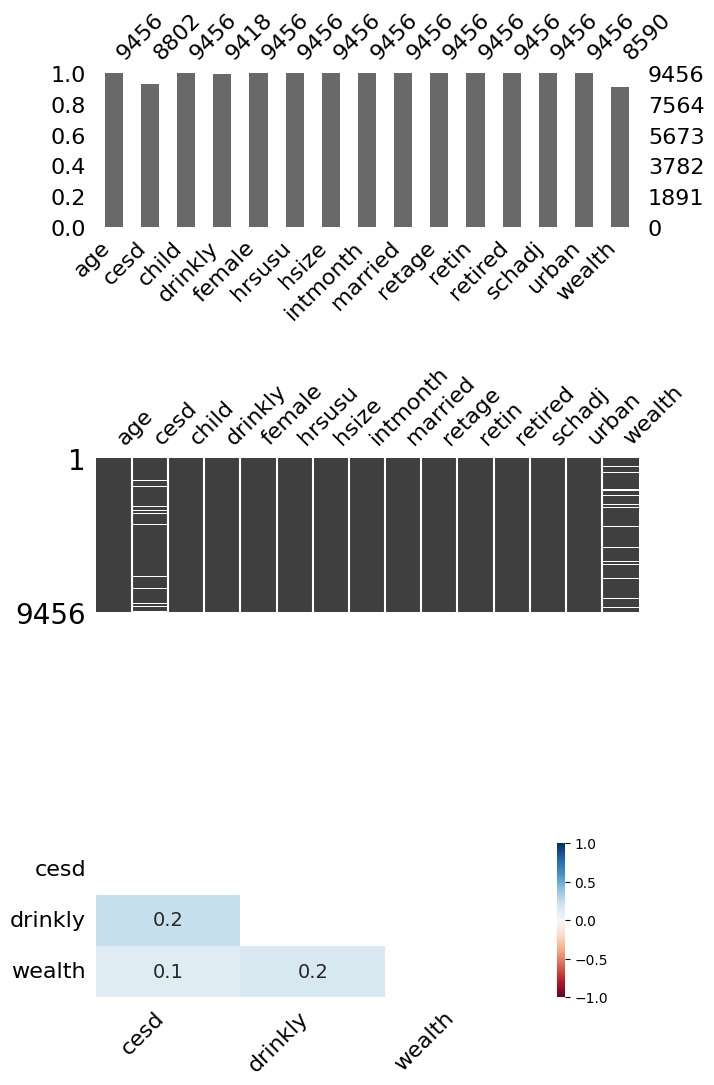

In [8]:
get_msno_plot(df)

*Note: Only three columns have missing values, that's why we see those on the last heatmap. This heatmap shows the correspondace between the missing values in one column, with the missing values in another column. This tries to show the correlation between missing values on drinkly, cesd, and wealth.*

# Visualización de relaciones entre variables
En esta sección se generan algunas visualizaciones para ver las relaciones entre las variables. Estas pueden indicar algunos outliers.

## Relación entre age y retage, según female
Se puede ver que a medida que aumenta la edad, las personas quieren retirarse en menos años. Quizás se puede ver una mayor concentración de hombres en la parte superior, indicando que a mayores esdades, los hombres planean retirarse más tarde.

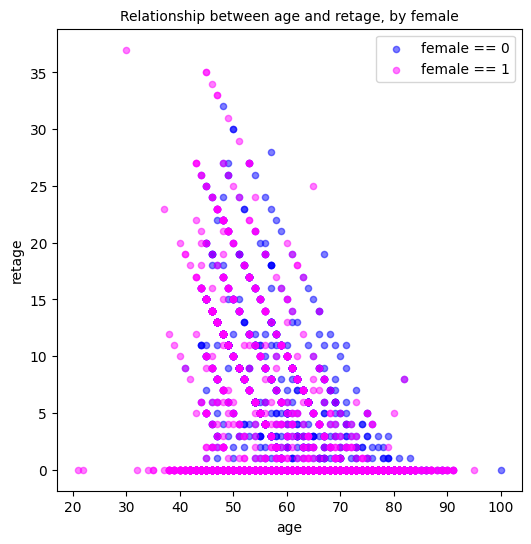

In [9]:
bi_scatter_by(df, 'female', 'age', 'retage')

## Relación entre retin y age, by hasdebt
Se puede ver que hay una concentración de personas que tienen deuda entre los 40 y los 70 años.


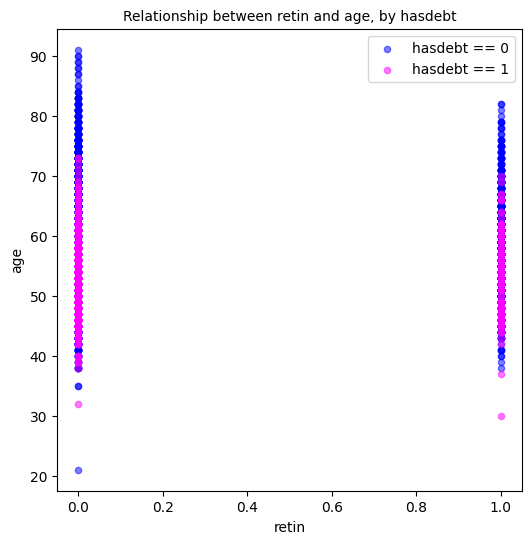

In [10]:
df = read_and_clean(data_path)
bi_scatter_by(df, 'hasdebt', 'retin', 'age')

## Correlación entre variables
Se genera la matriz de correlación entre las variables del dataframe. Si bien se destacan algunas variables con correlación de a lo más 0.3 o -0.4, ninguna tiene correlación perfecta.

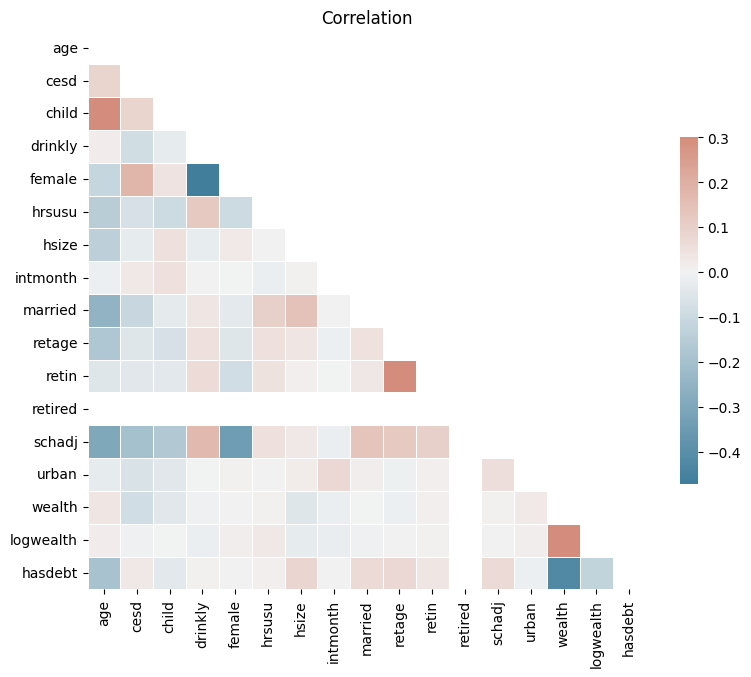

In [11]:
corr_plot(df)

# Notas sobre las columnas
En esta sección se mantienen algunas notas sobre las distintas columnas, para ver si se deben incluir en el modelo o no.
* age: La edad a la que se entró a la encuesta quizá no es tan relevante como la edad en la que fue encuestado. En este caso, si tenemos un solo periodo, ¿Es la edad actual?
* cesd: El puntaje obtenido en salud mental puede explicar que una persona se quiera retirar, bajo el supuesto que una persona con mala salud mental, no quiere ocuparse trabajando y viceversa.
* child: El número de hijos puede influir en si la persona planea retirarse, pues a ciertas combinaciones de edad de los hijos y la edad del trabajador, la persona puede no querer retirarse, pues tiene que mantener a su familia.
* drinkly: El consumo de alcohol en el ultimo mes; Quizá puede influir.
* Female: En el fondo esta variable diferencia el género entre hombre y mujer. Puede que si haya un efecto, dada la cultura y el tema de que hay una diferenciación entre las edades a las que los hombres y las mujeres se jubilan.
* hrsusu: La cantidad de horas que trabaja la persona diariamente. Quizá mas horas de trabajo llevan a querer jubilarse antes
* hsize: Quizá a mayores tamaños de hogar, las personas no quieran jubilarse, pues tienen que mantener a la familia.
* married: Quizá personas casadas pueden depender de la pareja, por lo que pueden retirarse antes.
* retage: Mientras más joven, debería ser un número de años más alto. Notar que si es 0, está retirado o no planea retirarse.
* retin: Si planea o no retirarse. Quizá esta pregunta está mal formulada... Hay que tener cuidado que si una persona no planea retirarse, no significa que no se quiera retirar, sino que aún no lo tiene pensado. Por lo tanto hay que revisar que personas que tienen retin=0, también deben tener retage=0
* retired: Si la persona está retirada o no: También se pueden detectar outliers en este punto, pues si la persona está retirada =1, no debe haber ninguno con retage>0 ni retin=1
* schadj: Los años de escolaridad.
* urban: Diferencias entre si la persona vive en el campo o en la ciudad.
* wealth: Quizá personas que tienen mayor riqueza, piensan en retirarse temprano, versus personas con menor, retirarse mas tarde.

# Preguntas

1. Cargar la base de datos *charls2.csv* en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 


2. Ejecute un modelo de probabilidad lineal (*MCO*) que permita explicar la probabilidad de que una persona que aun trabaja quiera retirarse (*retin*). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 


3. Ejecute un modelo *probit* para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 


4. Ejecute un modelo *logit*  para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 


5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?


6. Ejecute un modelo Poisson para explicar cuando planea retirarse las personas que planean hacerlo. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 


7. Determine sobre dispersion y posible valor optimo de alpha para un modelo Binomial Negativa.


8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para explicar el número de personas que hay dentro de un hogar. (*n_personas*). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 


9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?


# Pregunta 1: Limpieza del df
Dados los cambios y análisis anteriores, se vuelve a leer la tabla y se aplican limpiezas de N/A, resultando en 6593 filas. 

Notar que no se eliminaron potenciales outliers.

Notar que se generan dos columnas nuevas: hasdebt y logwealth.
* logwealth: Para generar esta columna, dado que hay valores negativos se agrega el valor mínimo y se aplica el logaritmo, con el objetivo de mantener la diferencia de riqueza en términos relativos.
* hasdebt: Se genera la dummy en base a si la persona tiene wealth negativo o no.

In [12]:
df = read_and_clean(data_path)
df.head()

,age,cesd,child,drinkly,female,hrsusu,hsize,intmonth,married,retage,retin,retired,schadj,urban,wealth,logwealth,hasdebt
0,46,6.0,2,0.0,1,0.000000,4,7,1,24,1,0,0,0,-5800.0,5.997474,1
1,48,0.0,2,1.0,0,4.143135,4,7,1,22,1,0,4,0,-5800.0,5.997474,1
2,56,6.0,1,0.0,1,0.000000,6,8,1,0,0,0,0,0,350.0,6.000152,0
3,59,6.0,1,1.0,0,0.000000,6,8,1,0,0,0,0,0,350.0,6.000152,0
4,47,4.0,1,1.0,0,3.806663,3,8,1,11,1,0,4,0,-8100.0,5.996468,1


## Elección de variables independientes
A continuación se señalan las columnas que se utilizarán como variables indepentiendtes. En la lista `independent_cols` se excluyen las siguientes variables, por los siguientes motivos:
1. retin: Es la variable dependiente
2. intmonth: No se considera que el mes en el que se preguntó sea influyente, ya que se tiene solo un ciclo de la encuesta en los datos
3. retired: Se filtró la base de datos, por lo que sólo tiene valores = 0, es decir, no retirado.
4. logwealth: Se consideran los efectos en función de la nueva variable hasdebt
5. wealth: Se consideran los efectos en función de la nueva variable hasdebt

nota: En los modelos cambia la variable dependiente de retin a retage, por lo que también pasa a exluirse la primera.

Se excluyen las columnas:  {'retired', 'retin', 'logwealth', 'wealth', 'intmonth'}


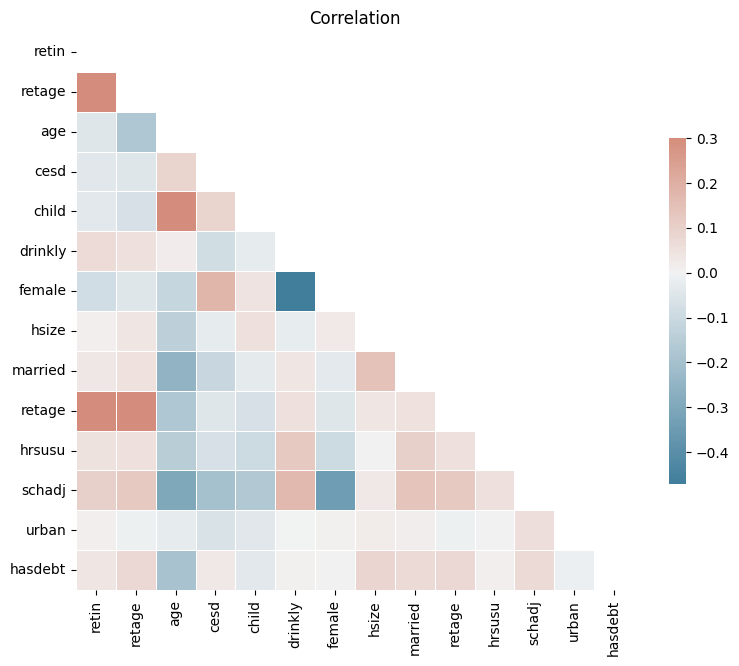

In [13]:
independent_cols = ['age', 'cesd', 'child', 'drinkly', 'female', 'hsize','married', 'retage', 'hrsusu', 'schadj', 'urban','hasdebt']
print("Se excluyen las columnas: ", set(df.columns) - set(independent_cols))
corr_plot(df[['retin', 'retage'] + independent_cols])

# Pregunta 2: MPL
Ejecute un modelo de probabilidad lineal (*MCO*) que permita explicar la probabilidad de que una persona que aun trabaja quiera retirarse (*retin*). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 


In [14]:
df = read_and_clean(data_path)
y=df['retin']
independent_cols = ['age', 'cesd', 'child', 'drinkly', 'female', 'retage','hsize', 'married', 'hrsusu', 'schadj', 'urban','hasdebt']
X=df[independent_cols]
X=sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  retin   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     948.7
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:49:07   Log-Likelihood:                -13.079
No. Observations:                6593   AIC:                             52.16
Df Residuals:                    6580   BIC:                             140.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2420      0.033     -7.363      0.0

## Respuesta 2: MPL
Para el modelo de probabilidad lineal MCO donde se busca explicar la probabilidad de que una que aún trabaja quiera retirarse, se hizo lo siguiente:
1. Se limpió la base de datos, verificando la presencia de outliers, tipos de datos, y otras validaciones de rangos en las variables.
2. Se revisaron las distribuciones de las variables y algunas relaciones entre ellas contra la variable explicada.
3. Se filtró para tener sólo a las personas que aún trabajan, eligiendo sólo a quienes tienen retin = 0.
4. Se utilizaron las columnas de la lista independent_cols, según el análisis de la sección anterior.


### Resultados
#####  Sobre el ajuste del modelo
Notamos que el modelo explica el 63.2% de la varianza, pues en el $R^{2}$, lo que corresponde a un valor relativamente alto en la regresión. La penalización del $R^{2}$ ajustado es leve, pues no se tienen tantas variables, entre otros.
El estadístico F para la prueba de hipótesis:
$$
H_0: \beta_i = 0 \qquad \forall i\\
H_1: \beta_i \neq 0 \qquad \exists i\\
$$
Rechaza la hipotesis nula con un 99.9% de confianza, indicando que alguno de los estimadores $\beta$ es significativo.

Al revisar las pruebas de T-student, podemos ver que muchos rechazan la hipotesis nula de:
$$
H_0: \beta_i = 0 \qquad  \\
H_1: \beta_i \neq 0 \qquad \\
$$
a un 95% de confianza, sin embargo hay otros estimadores para los que la rechaza. 

Al observar los valores de los coeficientes, y realizar una interpretación marginal de ellos, se nota que tienen valores muy bajos, de la orden de $10^{-2}$. Esto implica que los efectos de las variables sobre la probabilidad de que la persona planea o no retirarse son bajos. 

Cabe destacar que el modelo de probabilidad lineal sufre de un problema de diseño, donde bajo el criterio de ceteris paribus y asumiendo un todas las otras variables en el promedio, se obtiene que la probabilidad predicha es negativa, al menos hasta los 18 años aproximadamente. (Ver imagen en siguiente celda)

##### Interpretación de las variables
* $\beta_{const} = -0.2420$: El valor del intercepto
* $\beta_{age} =  0.0052$: Si la edad aumenta en un año, (sin importar cuantos años ya haya aumentado), la probabilidad de que una persona quiera retirarse aumenta en un $0.52\%$
* $\beta_{cesd} =  0.0002$: Si el puntaje obtenido en la escala de salud mental aumenta en 1, la probabilidad de que una persona quiera retirarse aumenta en un 0.02%. 
* $\beta_{child} = -0.0058$: Si la persona aumenta la cantidad de hijos en una unidad, entonces la probabilidad de que la persona quiera retirarse disminuye en un 0.58%.
* $\beta_{drinkly} =  0.0017$: Si la persona consumió alcohol en la ultima semana, la probabilidad de que la persona quiera retirarse aumenta en un 0.17%.
* $\beta_{female} = -0.0209$: Si la persona es mujer, disminuye en un 2% la probabilidad de que la persona quiera retirarse.
* $\beta_{hsize} = -0.0007$: Si el tamaño del hogar aumenta en un año la probabilidad de que una persona quiera retirarse, disminuye en un $-0.0.07\%$
* $\beta_{married} =  0.0220$: Si la persona está casada, aumenta en un $2.22\%$ la probabilidad de que planee retirarse
* $\beta_{retage} =  0.0700$: Si aumenta en un año la cantidad de años en los cuales la persona se quiere retirar, entonces aumenta en un 7% la probabilidad de que la persona planee retirarse.
* $\beta_{hrsusu} =  0.0039$: Si aumenta la cantidad de horas trabajadas en la semana, entonces la probabilidad de que la persona planee retirarse aumenta en un 0.39%.
* $\beta_{schadj} =  0.0024$: Si aumenta en un año la cantidad de años de escolaridad de una persona, entonces la probabilidad de que planee retirarse aumenta en un 0.2%.
* $\beta_{urban} =  0.0170$: Si la persona vive en la ciudad, entonces la probabilidad de que planee retirarse aumenta en un 1.7%.
* $\beta_{hasdebt} = -0.0053$: Si la persona está endeudada, entonces la probabilidad de que planee retirarse disminuye en un 0.5%.


### Notes on result table

1. coef: The value of the coefficient. Can be extracted throuth result.params (type array)
2. std err: The value of the standard errors of the coefficient
3. The value of the t statistic: As the error term follows a normal distribution, then $\beta$ values also follow a normal dstribution. Therefore, the t-student test is applied to validate the hypothesis that those coefficients are different than 0, using: t = b - B/stdE(b) (assume B=0 due to the hypothesis)
4. p values(P \gt |t| ): Probability of obtaining the t statistics at least as contradictory to H_0, as calculated from assuming that the null hypothesis is true. If p values are equal to to 0, then we reject the null hypothesis, therefore the coefficients are significant. note that if p=0.05, we can say with a 95% confidence that the coefficient is significant.

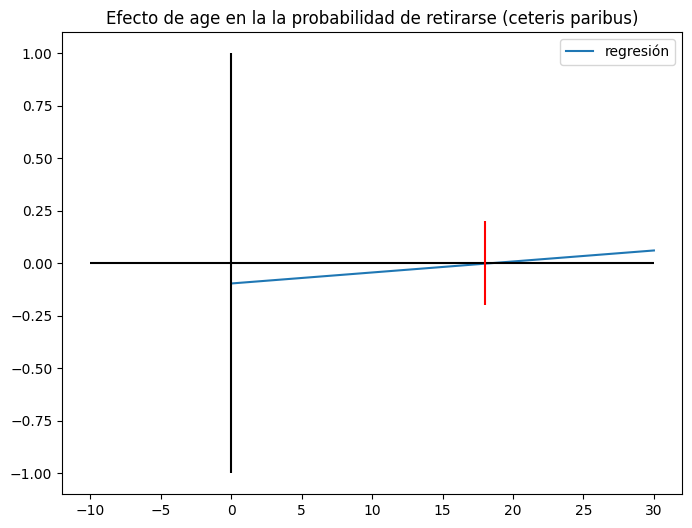

In [15]:
# See the effect of a single variable on the probability
# Relación estimada entre la probabilidad de querer retirarse y la variable, permaneciendo las demás variables explicativas constantes
variable = 'age'
x_max = 30
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Efecto de {} en la la probabilidad de retirarse (ceteris paribus)'.format(variable))
ax.plot(np.linspace(0,x_max,100), np.dot(results.params.drop(variable, inplace=False),X.describe().loc['mean'].drop(variable, inplace=False)) + np.linspace(0,x_max,100)*results.params[variable], "-", label="regresión")
ax.hlines(y = 0,xmin=-10, xmax = 30, colors='black')
ax.vlines(x = 0,ymin=-1, ymax = 1, colors='black')
ax.vlines(x = 18,ymin=-0.2, ymax = 0.2, colors='red')
ax.legend()
plt.show()

# Pregunta 3: Probit
Ejecute un modelo *probit* para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

In [16]:
df = read_and_clean(data_path)
y=df['retin']
independent_cols = ['age', 'cesd', 'child', 'drinkly', 'female','married', 'hsize', 'hrsusu', 'schadj', 'urban','hasdebt']
X=df[independent_cols]
X=sm.add_constant(X)
model = sm.Probit(y, X)
probit_model = model.fit()
print(probit_model.summary())

mfx = probit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.493231
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                  retin   No. Observations:                 6593
Model:                         Probit   Df Residuals:                     6581
Method:                           MLE   Df Model:                           11
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                 0.01656
Time:                        18:49:07   Log-Likelihood:                -3251.9
converged:                       True   LL-Null:                       -3306.6
Covariance Type:            nonrobust   LLR p-value:                 2.303e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9268      0.195     -4.764      0.000      -1.308      -0.545
age           -0.0018      0.

## Respuesta 3: Probit
Para este modelo se obtienen resultados distintos a los del modelo de probabilidad lineal de la pregunta anterior, en los siguientes sentidos:
1. El test de Pseudo $R^{2}$ indica que una proporción mucho menor de la varianza está explicada por el modelo.
2. Este modelo está estimado mediante el EMV.
3. Al ver los valores P de las pruebas $P>|z|$ de los estimadores, se pude ver que se acepta la hipotesis nula para muchos más $\beta_i$ que en el caso anterior.

### Interpretación marginal
En esta sección se caracteriza el efecto marginal de cada uno de los estimadores, siguiendo los valores de la segunda tabla de la celda anterior. 
* $\frac{dy}{dx}\small{\text{age}} = -0.0005$: Si aumenta la edad, disminuye en un 0.05% la probabilidad de que la persona planee retirarse. Esto es contrario a MLP.
* $\frac{dy}{dx}\small{\text{cesd}} = -0.0009$: Si aumenta el puntaje de salud mental, disminuye en un 0.09% la probabilidad de que la persona planee retirarse.
* $\frac{dy}{dx}\small{\text{child}} = -0.0047$: Si aumenta la cantidad de hijos, la probabilidad de que la persona planee retirarse disminuye en un 0.47%.
* $\frac{dy}{dx}\small{\text{drinkly}} =  0.0231$: Si la persona bebió alcohol, aumenta la probabilidad de que planee retirarse en un 2.31%.
* $\frac{dy}{dx}\small{\text{female}} = -0.0364$: Si la persona es mujer, disminuye en un 3.64% la probabilidad de que quiera retirarse.
* $\frac{dy}{dx}\small{\text{married}} =  0.0151$: Si la persona está casada, aumenta en un 1.51% la probabilidad de que planee retirarse.
* $\frac{dy}{dx}\small{\text{hsize}} =  0.0008$: Si el tamaño del hogar aumenta, aumenta la probabilidad de que planeee retirarse en un 0.08%.
* $\frac{dy}{dx}\small{\text{hrsusu}} =  0.0091$: Si aumenta la cantidad de horas trabajadas, aumenta la probabilidad de que planee retirarse en un 0.91%.
* $\frac{dy}{dx}\small{\text{schadj}} =  0.0069$: Si aumentan los años que la persona estudió, aumenta la probabiliad de que planee retirarse en un 0.69%.
* $\frac{dy}{dx}\small{\text{urban}} =  0.0038$: Si la persona vive en la ciudad, aumenta en un 0.38% la probabilidad de que planee retirarse.
* $\frac{dy}{dx}\small{\text{hasdebt}} =  0.0339$: Si la persona tiene deudas, aumenta en un 3.39% la probabilidad de que planee retirarse

Intuitivamente, podría afirmar que este modelo no explica de la mejor manera la relación entre las variables. Quizá es un problema de selección de variables, donde no se puede decir con un alto nivel de confianza que el valor del estimador sea ese, pues para muchos se acepta la hipotesis nula. Sin embargo, se tiene un mejor modelo en el sentido de la construción, pues tiene restringidos los valores que puede tomar la variable dependiente.

# Pregunta 4: Logit
Ejecute un modelo *logit*  para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

In [17]:
df = read_and_clean(data_path)
y=df['retin']
independent_cols = ['age', 'cesd', 'child', 'drinkly', 'female', 'hsize','married', 'hrsusu', 'schadj', 'urban','hasdebt']
X=df[independent_cols]
X=sm.add_constant(X)
model = sm.Logit(y, X)
logit_model = model.fit()
print(logit_model.summary())

mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.493171
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  retin   No. Observations:                 6593
Model:                          Logit   Df Residuals:                     6581
Method:                           MLE   Df Model:                           11
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                 0.01668
Time:                        18:49:08   Log-Likelihood:                -3251.5
converged:                       True   LL-Null:                       -3306.6
Covariance Type:            nonrobust   LLR p-value:                 1.602e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5508      0.343     -4.522      0.000      -2.223      -0.879
age           -0.0031      0.

## Respuesta 4: Logit
El modelo presenta las mismas diferencias planteadas en la pregunta anterior respecto a el MLP. Sin embargo, los resultados se parecen a los del Probit en los signos.
#### Interpretación marginal de los coeficientes
La interpretación marginal es la misma que en probit, sólo cambian los valores; los signos se mantienen igual. Debido a lo anterior, no se replica el analisis para cada variable independiente.

* $\frac{dy}{dx}\small{\text{age}} = -0.0005$
* $\frac{dy}{dx}\small{\text{cesd}} = -0.0009$
* $\frac{dy}{dx}\small{\text{child}} = -0.0051$
* $\frac{dy}{dx}\small{\text{drinkly}} =  0.0228$
* $\frac{dy}{dx}\small{\text{female}} = -0.0363$
* $\frac{dy}{dx}\small{\text{married}} =  0.0009$
* $\frac{dy}{dx}\small{\text{hsize}} =  0.0158$
* $\frac{dy}{dx}\small{\text{hrsusu}} =  0.0090$
* $\frac{dy}{dx}\small{\text{schadj}} =  0.0070$
* $\frac{dy}{dx}\small{\text{urban}} =  0.0046$
* $\frac{dy}{dx}\small{\text{hasdebt}} =  0.0335$


# Pregunta 5: Discusión resultados 2,3,4
Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?


## Respuesta 5: Discusión resultados 2,3,4
Los resultados obtenidos son comparables en el sentido de los cambios marginales. Se obtuvo conclusiones diferentes entre MPL versus Logit y Probit, que provienen seguramente de un problema de selección de variables, donde para el MLP las variables tienen una mejor capacidad de explicar la varianza y rechazan más hipotesis nulas que en los otros dos. Debido a lo anterior, los cambios marginales sobre los que uno puede concluir en Probit y en Logit no son quizás los que corresponden a la intuición, puesto que los coeficientes estimados no están cerca del valor real (ver valores P.)


Mi opinion es que en este caso es sufciente con el MLP, porque permite generar una interpretación de los resultados y se validan más supuestos que en el probit y logit, a pesar de las deficiencias de construcción de este modelo, que fueron discutidas anteriormente. Sin embargo, me interesa recalcar, que si se eligen otras variables dependientes, los modelos Logit y Probit tendrían un mejor desempeño en la predicción de otros valores, así como en la interpretación, debido a la forma en que se calculan los cambios marginales en estos ultimos dos modelos.

Las variables que resultaron ser robustas a la especificación fueron female y schadj entre los tres modelos al 5% de confianza. Más variables fueron robustas a la especificacion entre logit y probit.


#### Comparación de Coeficientes $\beta$ entre logit y probit
|column|MPL|probit|logit|
|------|--------|-----|----|
|age | 0.0052    | -0.0018 | -0.0031| 
|cesd | 0.0002    | -0.0031 | -0.0057| 
|child |-0.0058    | -0.0169 | -0.0321| 
|drinkly | 0.0017  |  0.0836 |  0.1442| 
|female |-0.0209  | -0.1319 | -0.2302| 
|married | 0.0220  |  0.0546 |  0.0054| 
|hsize |-0.0007  |  0.0028 |  0.1000| 
|hrsusu | 0.0039  |  0.0330 |  0.0572| 
|schadj | 0.0024  |  0.0251 |  0.0446| 
|urban | 0.0170  |  0.0137 |  0.0292| 
|hasdebt |-0.0053  |  0.1228 |  0.2126| 
retage |0.0700| --|---|


Notar que en los modelos el signo obtenido para los coeficientes es el mismo entre logit y probit, no así para MPL.

A continuación, se comparan los valores en su valor marginal:

|    columna    |   probit (dy/dx)  |   logit   (dy/dx)   |
|--------|-----|---------|
age      |  -0.0005   | -0.0005 |
cesd     |  -0.0009   | -0.0009 |
child    |  -0.0047   | -0.0051 |
drinkly  |   0.0231   |  0.0228 |
female   |  -0.0364   | -0.0363 |
hsize    |   0.0151   |  0.0009 |
married  |   0.0008   |  0.0158 |
hrsusu   |   0.0091   |  0.0090 |
schadj   |   0.0069   |  0.0070 |
urban    |   0.0038   |  0.0046 |
hasdebt  |   0.0339   |  0.0335 |

Notamos que los coeficientes en su valor marginal tienen la misma tendencia entre logit y probit.

# Pregunta 6: Poisson
Ejecute un modelo Poisson para explicar cuando planea retirarse las personas que planean hacerlo. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

In [18]:
# Note that the dependent variable changes, weil here the question regards to the count data on when to retire.
df = read_and_clean(data_path)
print("Value counts de retin: (0 no planea retirarse, 1 planea retirarse)")
print(df.retin.value_counts())
print("Notar que se aplica un filtro, para tener solo a las personas que planean retirarse, por lo que N disminuye a 1324")
df = df[df.loc[:,'retin'] == 1]
y=df['retage']
independent_cols = ['age', 'cesd', 'child', 'drinkly', 'female', 'hsize','married', 'hrsusu', 'schadj', 'urban','hasdebt']
X=df[independent_cols]
X=sm.add_constant(X)
poisson=sm.GLM(y,X,family=sm.families.Poisson()).fit()
print(poisson.summary())
print("fitted lambda")
print(poisson.mu)

Value counts de retin: (0 no planea retirarse, 1 planea retirarse)
0    5269
1    1324
Name: retin, dtype: int64
Notar que se aplica un filtro, para tener solo a las personas que planean retirarse, por lo que N disminuye a 1324
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 retage   No. Observations:                 1324
Model:                            GLM   Df Residuals:                     1312
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4436.8
Date:                Fri, 14 Apr 2023   Deviance:                       3865.8
Time:                        18:49:08   Pearson chi2:                 3.89e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7462
Covariance Type:            nonrobust                        

## Respuesta 6: Poisson
En la celda anterior se ejecuta el modelo Poisson para explicar cuando se planean retirar las personas que planean hacerlo, es decir, la variable de conteo retage. Notar que se aplica un filtro, para tener solo a las personas que planean retirarse, por lo que N disminuye a 1324.

Notamos queel Pseudo $R^{2}$ es alto, indicando un buen ajuste de cerca del 70%. Por otro lado, el valor de chi2 es alto, lo que indica una diferencia significativa entre lso datos observados y los valores ajustados por el modelo, por lo que el modleo no se ajusta muy bien.
#### Interpretación 
1. "age" es -0.0502, lo que indica que tras un aumento de un año en la edad, se obtiene una disminución de exp(-0.0502) = 0.95 en retage, es decir, mientras mayores son las personas, más pronto se quieren retirar (ceteris paribus).
2. "urban" es -0.1552, lo que indica que si una persona vive en un area urbana, retage disminuye en exp(-0.1552) = 0.856 años.
3. "drinkly" es  0.0653, lo que indica que si una persona bebe alcohol, se asocia un aumento de exp(0.0653) = 1.07 años en retage
4. "female" es  0.0346, lo que indica que si una persona es mujer, se aocia un aumento de exp(0.0346) = 1.035 años en retage, por lo que las mujeres tenderían a retirarse más tarde que los hombres. 
5. "hasdebt" es  0.0627, lo que indica que si una persona tiene deudas, se asocia un aumento de exp(0.0627) = 1.064 en la edad de jubilación, lo que coincide con la intuición de que deberían mantenerse en la fuerza de trabajo para pagar sus deudas.
Los coeficientes "cesd", "child", "hsize", "married", and "schadj" no son significantes al 5% de confianza, según se puede ver en los valores p.


# Pregunta 7: Dispersión y Alpha
Determine sobre dispersion y posible valor optimo de alpha para un modelo Binomial Negativa.

### Test overdispersion

A simple test for overdispersion can be determined with the results of the Poisson model, using the ratio of Pearson chi2 / Df Residuals. A value larger than 1 indicates overdispersion. In the case above (6), data suggets overdispersion.

The Negative Binomial model estimated above is using a value of $\theta$ (or $\alpha=1/\theta$) equal to 1. In order to determine the appropiate value of $\alpha$, you can estimate a simple regression using the output of the Poisson model:

1. Construct the following variable aux=$[(y-\lambda)^2-\lambda]/\lambda$
2. Regress the variable aux with $\lambda$ as the only explanatory variable (no constant)
3. The estimated value is an appropiate guess for $\alpha=1/\theta$

In the model of the previous section, just use the options on sm.families.NegativeBinomial, in order to manually enter the value of alpha. See example below.

Así, según los resultados de la Poisson, podemos ver que Pearson chi2: 3.89e+03 y Df Residuals: 1312, luego, podemos calcular el ratio y determinar la sobredispersión.

In [19]:
test_overdispersion = poisson.pearson_chi2/poisson.df_resid
print(test_overdispersion)

2.9620179075446083


Luego, como el valor es mayor que 1, se sugiere que el modelo tiene sobre dispersión. Esto indica que la varianza de los datos es mayor a la que se esperaba con el modelo de Poisson. Lo anterior puede deberse a:
1. Problema de especificación
2. Falta de variables

Esto puede llevar a:
1. Extimaciones de coeficientes imprecisas =° subestimar el error estandar =° obtener falsos intervalos de confianza.

Debido a lo anterior, se recomienda usar un modelo de regresión con binomial negativa. Para esto se obtiene el alpha a continuación:

In [20]:
# Test de dispersion
aux=((y-poisson.mu)**2-poisson.mu)/poisson.mu
auxr=sm.OLS(aux,poisson.mu).fit()
print('El valor de alpha es: x1= {:.3f}'.format(auxr.params['x1']))

El valor de alpha es: x1= 0.199


In [21]:

# se ejecuta un modelo de binomial negativa.
negbin=sm.GLM(y,X,family=sm.families.NegativeBinomial(alpha=auxr.params['x1'])).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 retage   No. Observations:                 1324
Model:                            GLM   Df Residuals:                     1312
Model Family:        NegativeBinomial   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3876.4
Date:                Fri, 14 Apr 2023   Deviance:                       1485.7
Time:                        18:49:08   Pearson chi2:                 1.43e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9398      0.173     28.576      0.0

Notar que si se hace el test de sobredispersión con el resultado de la binomial negativa, se obtiene un ratio mucho menor, cercano a 1, lo que indica que este modelo mejoró la especificación.

# Pregunta 8: Binomial Negativa
Usando la informacion anterior, ejecute un modelo Binomial Negativa para explicar el número de personas que hay dentro de un hogar. (*n_personas*). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 


In [22]:
df = read_and_clean(data_path)

y=df['hsize']
independent_cols = ['age', 'child','married', 'urban']
X=df[independent_cols]
X=sm.add_constant(X)

negbin=sm.GLM(y,X,family=sm.families.NegativeBinomial()).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  hsize   No. Observations:                 6593
Model:                            GLM   Df Residuals:                     6588
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16183.
Date:                Fri, 14 Apr 2023   Deviance:                       1086.1
Time:                        18:49:08   Pearson chi2:                 1.16e+03
No. Iterations:                     6   Pseudo R-squ. (CS):           0.008169
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5344      0.118     13.051      0.0

# Respuesta 8
Para explicar el tamaño de la casa, hsize, se seleccionaron variable que se supone pueden tener relación con el tamaño de la casa, que son notablemente diferentes a las usadas en regresiones anteriores, pues cumplen un objetivo distinto. Se usó la intuición para cada elegir cada una de ellas, tal que:
1. Age: supone que en distintas etapas de la vida se comparte el hogar con distintos numeros de personas.
2. child: personas que tienen hijos pasan automaticamente a tener más personas en el hogar.
3. married: personas que estan casadas pasan automaticamente a tener más personas en el hogar. (si viven con la pareja)
4. urban: Supone que hay un comportamiento distinto entre hogares de la ciudad y del campo.

#### Interpretación del resultado
Notamos que se obtiene un pseudo r2 muy bajo, por lo que el modelo explica un bajo porcentaje de la varianza, lo que quizá se debe a la falta de variables independientes incluidas en el modelo.

Se interpretan los coeficientes notando que se encuentran en su forma de conteo logaritmica (por construcción de la binomial negativa):
1. age: Si la edad aumenta en una unidad, el logaritmo de la cantidad de personas en el hogar disminuye en 0.0089 unidades = exp(0.0089) = (~ 1 una persona)
2. Si la persona tiene hijos, aumenta en una persona (np.exp(0.045) = 1.04) la cantidad de personas que vive en el hogar.
3. Si la persona está casada, la cantidad de personas en el hogar aumenta en 1.2 personas.

Notar que la variable urban no resulta ser significativa según los valores p.

In [23]:
import numpy as np
for coef in negbin.params:
    print(coef,'',np.exp(coef))

1.5343630968168946  4.6383703961170735
-0.008932021117091432  0.9911077508806643
0.045887715915119004  1.0469568477652618
0.19586675898384895  1.2163648248513983
0.026332898156310323  1.0266826723594047


# Pregunta 9: Discusión resultados 6,7 y 8
Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

## Respuesta 9
Las diferencias entre los resultados se deben a distintos motivos:
1. Los modelos son distintos, por lo que llevan distintos supuestos y siguen distintas ecuaciones.
2. Los modelos tienen distintas variables independientes y dependientes.
3. La similitud entre los ejercicios anteriores es que la variable dependiente es una variable de conteo.

Considero que el modelo más adecuado para las preguntas de investigación anteriores (que son distitas), sería aquel que tenga el mejor ajuste y, en el caso de que el modelo de poisson tenga sobredispersión, sería aquel modelo de binomial negativa que use el alpha determinado, pues ese se ajustaría de mejor forma al error y pasaría mejor los supuestos.

Debido a que los modelos tienen distintas variables, no se determina que una u otra variable haya sido robusta a la especificación, pues el modelo, la pregunta y las variables cambiaron.


# Referencias
1. [GLM Statmodels](https://www.statsmodels.org/dev/glm.html)
2. Wooldrige, 2009: Introducción a la econometría.
3. [Missing values](https://towardsdatascience.com/visualizing-missing-values-in-python-is-shockingly-easy-56ed5bc2e7ea)
4. [Visualizations](https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c)
5. [Correlation matrix](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)
6. [Result table OLS SM](https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/)
7. [Apuntes de clase]